In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/hiromi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
sns.set()

In [3]:
df = pd.read_csv("Oscarsdata.csv")

In [94]:
df.head(2)

,year_film,year_ceremony,ceremony,category,name,film,winner,distributor
0,2020,2021,93,ACTOR IN A LEADING ROLE,Chadwick Boseman,Ma Rainey's Black Bottom,False,Netflix
1,2020,2021,93,ACTOR IN A LEADING ROLE,Gary Oldman,Mank,False,Netflix


In [5]:
# df.describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10515 entries, 0 to 10514
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10515 non-null  int64 
 1   year_ceremony  10515 non-null  int64 
 2   ceremony       10515 non-null  int64 
 3   category       10515 non-null  object
 4   name           10515 non-null  object
 5   film           10209 non-null  object
 6   winner         10515 non-null  bool  
 7   distributor    1212 non-null   object
dtypes: bool(1), int64(3), object(4)
memory usage: 585.4+ KB


In [95]:
# df[df.distributor.isna()]
# df[df.distributor.notna()]
# df[df.film.isna()]

- 'year_film' = 2011~2020 contains info in 'distributor' columns
- some award like HONORARY AWARD, SPECIAL AWARD don't has 'film' but  prople's 'name'.

In [7]:
# df.category.unique()
df2 = pd.DataFrame(df.category.value_counts())
df2.head(18)
#Just check. why 18? -- AMPAS has 17 brunch + everyone can vote Best Picture

,category
DIRECTING,454
FILM EDITING,435
ACTOR IN A SUPPORTING ROLE,425
ACTRESS IN A SUPPORTING ROLE,425
DOCUMENTARY (Short Subject),373
BEST PICTURE,341
DOCUMENTARY (Feature),340
CINEMATOGRAPHY,323
FOREIGN LANGUAGE FILM,315
ART DIRECTION,307


In [8]:
# df3 = pd.DataFrame(df.groupby("year_film").sum()["winner"])
# df3.plot()

In [9]:
# df[df.category == 'ACTOR IN A LEADING ROLE']

In [10]:
df4 = df[df.category == 'DIRECTING']
len(df4.name.value_counts())

243

In [11]:
df_nom_director = pd.DataFrame(df4.name.value_counts().nlargest(10)).rename(columns={"name": "nomination"})
df_nom_director

,nomination
William Wyler,12
Martin Scorsese,9
Billy Wilder,8
David Lean,7
Woody Allen,7
Steven Spielberg,7
Fred Zinnemann,7
Frank Capra,6
John Ford,5
George Cukor,5


#### 243 people have been nominated to the DIRECTING award. Steven Spielberg has been nominated 7 times.

In [12]:
df5 = df[(df.category == 'DIRECTING') & (df.winner == True)]
len(df5.name.value_counts())

70

In [100]:
df_win_director = pd.DataFrame(df5.name.value_counts()).rename(columns={"name": "win"})

In [103]:
#df_win_director

In [73]:
df[(df.name =="Steven Spielberg") &(df.winner == True)]

,year_film,year_ceremony,ceremony,category,name,film,winner,distributor
2654,1998,1999,71,DIRECTING,Steven Spielberg,Saving Private Ryan,True,NaN
3228,1993,1994,66,DIRECTING,Steven Spielberg,Schindler's List,True,NaN
4045,1986,1987,59,IRVING G. THALBERG MEMORIAL AWARD,Steven Spielberg,NaN,True,NaN


In [101]:
df_director = pd.concat([df_nom_director, df_win_director], axis=1, join="inner")

In [102]:
df_director.to_csv('directing_award_ranking.csv')

#### 70 people have won the DIRECTING award. Steven Spielberg has won it twice. He also got IRVING G. THALBERG MEMORIAL AWARD	in 1986.

In [16]:
df6 = df[df.year_film >= 2011]
# df6.info()
# df6[df6.film.isna()]

In [17]:
df6 = df6.dropna(subset=['film'])      #remove special awards  
df6.info()
# df6.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1248
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      1212 non-null   int64 
 1   year_ceremony  1212 non-null   int64 
 2   ceremony       1212 non-null   int64 
 3   category       1212 non-null   object
 4   name           1212 non-null   object
 5   film           1212 non-null   object
 6   winner         1212 non-null   bool  
 7   distributor    1212 non-null   object
dtypes: bool(1), int64(3), object(4)
memory usage: 76.9+ KB


In [18]:
# df6.info()
# df6.distributor.unique()
# (df6['distributor'] == 'Amazon Studios').sum()
# df6['distributor'].str.contains('Amazon').sum()
df6[df6.distributor.str.contains('Amazon',na=False)].distributor.value_counts()

Amazon Studios                          22
Amazon Studios and Cohen Media Group     1
Name: distributor, dtype: int64

In [19]:
df6[df6.distributor == 'Amazon Studios and Cohen Media Group']

,year_film,year_ceremony,ceremony,category,name,film,winner,distributor
567,2016,2017,89,FOREIGN LANGUAGE FILM,Iran,The Salesman,True,Amazon Studios and Cohen Media Group


In [20]:
df6 = df6.replace( 'Amazon Studios and Cohen Media Group', 'Amazon Studios')

In [21]:
df6[df6.distributor.str.contains('Netflix',na=False)].distributor.value_counts()

Netflix                                                                      88
Netflix in association with Worldview Entertainment and Participant Media     1
Name: distributor, dtype: int64

In [22]:
df6[df6.distributor == 'Netflix in association with Worldview Entertainment and Participant Media']

,year_film,year_ceremony,ceremony,category,name,film,winner,distributor
928,2013,2014,86,DOCUMENTARY (Feature),Jehane Noujaim and Karim Amer,The Square,False,Netflix in association with Worldview Entertai...


In [23]:
df6 = df6.replace('Netflix in association with Worldview Entertainment and Participant Media', 'Netflix')

In [24]:
df6[df6.distributor.str.contains('Apple',na=False)].distributor.value_counts()

Apple/GKIDS    1
Apple          1
Name: distributor, dtype: int64

In [25]:
df6[df6.distributor == 'Apple/GKIDS']

,year_film,year_ceremony,ceremony,category,name,film,winner,distributor
24,2020,2021,93,ANIMATED FEATURE FILM,"Tomm Moore, Ross Stewart, Paul Young and Stéph...",Wolfwalkers,False,Apple/GKIDS


In [26]:
df6 = df6.replace('Apple/GKIDS', 'Apple')

In [27]:
df6[df6.distributor.str.contains('Hulu',na=False)].distributor.value_counts()

Hulu    2
Name: distributor, dtype: int64

In [28]:
# (df6['distributor'] == 'Amazon Studios').sum()
# (df6['distributor'] == 'Netflix').sum()
# (df6['distributor'] == 'Apple').sum()

In [29]:
df7 = df6[['year_film','distributor','winner']]

In [30]:
df7.set_index('year_film')

,distributor,winner
year_film,,
2020,Netflix,False
2020,Netflix,False
2020,A24,False
2020,Amazon Studios,False
2020,Sony Pictures Classics,True
...,...,...
2011,Sony Pictures Classics,False
2011,Universal,False
2011,Roadside Attractions,False


In [31]:
# df7.info()

In [32]:
total_nom = df7.year_film.value_counts().sort_index(ascending=False).reset_index().rename(columns={"year_film": "total_nom"})

In [33]:
total_win = df7[df7.winner == True].year_film.value_counts().sort_index(ascending=False).reset_index().rename(columns={"year_film": "total_win"})

In [34]:
netflix_nom = df7[df7.distributor == 'Netflix'].year_film.value_counts().sort_index(ascending=False).reset_index().rename(columns={"year_film": "netflix_nom"})

In [35]:
netflix_win = df7[(df7.distributor == 'Netflix') & (df7.winner == True)].year_film.value_counts().sort_index(ascending=False).reset_index().rename(columns={"year_film": "netflix_win"})

In [36]:
amazon_nom = df7[df7.distributor == 'Amazon Studios'].year_film.value_counts().sort_index(ascending=False).reset_index().rename(columns={"year_film": "amazon_nom"})

In [37]:
amazon_win = df7[(df7.distributor == 'Amazon Studios') & (df7.winner == True)].year_film.value_counts().sort_index(ascending=False).reset_index().rename(columns={"year_film": "amazon_win"})

In [38]:
apple_nom = df7[df7.distributor == 'Apple'].year_film.value_counts().sort_index(ascending=False).reset_index().rename(columns={"year_film": "apple_nom"})

In [39]:
df7[(df7.distributor == 'Apple') & (df7.winner == True)].year_film.value_counts().sort_index(ascending=False)

Series([], Name: year_film, dtype: int64)

In [40]:
hulu_nom = df7[df7.distributor == 'Hulu'].year_film.value_counts().sort_index(ascending=False).reset_index().rename(columns={"year_film": "hulu_nom"})

In [41]:
df7[(df7.distributor == 'Hulu') & (df7.winner == True)].year_film.value_counts().sort_index(ascending=False)

Series([], Name: year_film, dtype: int64)

In [42]:
df_oscars = pd.merge(total_nom, total_win).merge(netflix_nom, how='outer').merge(netflix_win, how='outer').merge(amazon_nom,how='outer').merge(amazon_win, how='outer').merge(apple_nom, how='outer').merge(hulu_nom,how='outer')

In [43]:
df_oscars = df_oscars.rename(columns={"index": "year_film"}).set_index("year_film").fillna(0).astype('int')

In [44]:
df_oscars['streamers_nom'] = df_oscars['netflix_nom'] + df_oscars['amazon_nom'] + df_oscars['apple_nom'] + df_oscars['hulu_nom']

In [45]:
df_oscars['streamers_win'] = df_oscars['netflix_win'] + df_oscars['amazon_win'] 

In [46]:
df_oscars['classic_nom'] = df_oscars['total_nom'] - df_oscars['streamers_nom']

In [47]:
df_oscars['classic_win'] = df_oscars['total_win'] - df_oscars['streamers_win']

In [48]:
#Netflix's batting average(%) 
df_oscars['netflix_ba'] = df_oscars['netflix_win'] / df_oscars['netflix_nom']*100

In [49]:
#Amazon's batting average(%) 
df_oscars['amazon_ba'] = df_oscars['amazon_win'] / df_oscars['amazon_nom']*100

In [50]:
#total batting average(%)
df_oscars['total_ba'] = df_oscars['total_win'] / df_oscars['total_nom']*100

In [104]:
df_oscars

,total_nom,total_win,netflix_nom,netflix_win,amazon_nom,amazon_win,apple_nom,hulu_nom,streamers_nom,streamers_win,classic_nom,classic_win,netflix_ba,amazon_ba,total_ba
year_film,,,,,,,,,,,,,,,
2020,118,23,35,6,12,2,2,2,51,8,67,15,17.142857,16.666667,19.491525
2019,124,24,24,2,0,0,0,0,24,2,100,22,8.333333,NaN,19.354839
2018,121,24,15,4,3,0,0,0,18,4,103,20,26.666667,0.000000,19.834711
2017,122,24,8,1,1,0,0,0,9,1,113,23,12.500000,0.000000,19.672131
2016,122,24,3,1,7,3,0,0,10,4,112,20,33.333333,42.857143,19.672131
2015,121,24,2,0,0,0,0,0,2,0,119,24,0.000000,NaN,19.834711
2014,121,24,1,0,0,0,0,0,1,0,120,24,0.000000,NaN,19.834711
2013,122,24,1,0,0,0,0,0,1,0,121,24,0.000000,NaN,19.672131
2012,122,25,0,0,0,0,0,0,0,0,122,25,NaN,NaN,20.491803


In [52]:
df_oscars.to_csv("oscars_streaming.csv")

In [53]:
df_oscars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2020 to 2011
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   total_nom      10 non-null     int64  
 1   total_win      10 non-null     int64  
 2   netflix_nom    10 non-null     int64  
 3   netflix_win    10 non-null     int64  
 4   amazon_nom     10 non-null     int64  
 5   amazon_win     10 non-null     int64  
 6   apple_nom      10 non-null     int64  
 7   hulu_nom       10 non-null     int64  
 8   streamers_nom  10 non-null     int64  
 9   streamers_win  10 non-null     int64  
 10  classic_nom    10 non-null     int64  
 11  classic_win    10 non-null     int64  
 12  netflix_ba     8 non-null      float64
 13  amazon_ba      4 non-null      float64
 14  total_ba       10 non-null     float64
dtypes: float64(3), int64(12)
memory usage: 1.2 KB


<AxesSubplot:xlabel='year_film'>

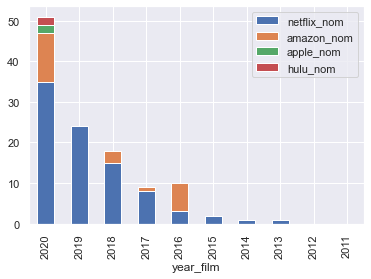

In [54]:
df_oscars[['netflix_nom','amazon_nom','apple_nom','hulu_nom']].plot(kind="bar", stacked = True)

In [55]:
df_noms = pd.DataFrame(df7.groupby(by='year_film').distributor.value_counts().groupby(level=0).nlargest(5)).reset_index(0,1)
df_noms

distributor
year_film distributor                              
2011      Paramount                              16
          The Weinstein Company                  16
          Sony Pictures Releasing                13
          Touchstone Pictures                    11
          Fox Searchlight                         8
2012      The Weinstein Company                  17
          20th Century Fox                       12
          Walt Disney/20th Century Fox           12
          Universal                              11
          Sony Pictures Classics                  8
2013      Warner Bros                            21
          Sony Pictures Releasing                16
          Paramount                              13
          Fox Searchlight                         9
          The Weinstein Company                   9
2014      Fox Searchlight                        20
          Sony Pictures Classics                 18
          Warner Bros                            11
          The Weinstein Company                   9
          Walt Disney                             9
2015      20th Century Fox                       20
          Warner Bros                            11
          The Weinstein Company                   9
          Walt Disney                             9
          A24                                     7
2016      Summit Entertainment                   22
          Paramount                              18
          A24                                     9
          Walt Disney                             8
          Amazon Studios                          7
2017      Fox Searchlight                        20
          Focus Features                         14
          Warner Bros                            14
          Walt Disney                            10
          Netflix                                 8
2018      Walt Disney                            17
          Fox Searchlight                        15
          Netflix                                15
          Annapurna Pictures                     10
          Universal                               9
2019      Netflix                                24
          Sony Pictures Releasing                18
          Walt Disney                            16
          Universal                              12
          Warner Bros                            12
2020      Netflix                                35
          Amazon Studios                         12
          Walt Disney                             8
          Warner Bros                             8
          Focus Features                          7

In [56]:
#df_noms.unstack().plot(kind = 'bar',  y = 'distributor', figsize=(8, 8) )

In [57]:
df6.head(2)

,year_film,year_ceremony,ceremony,category,name,film,winner,distributor
0,2020,2021,93,ACTOR IN A LEADING ROLE,Chadwick Boseman,Ma Rainey's Black Bottom,False,Netflix
1,2020,2021,93,ACTOR IN A LEADING ROLE,Gary Oldman,Mank,False,Netflix


In [58]:
df6.category.unique()

array(['ACTOR IN A LEADING ROLE', 'ACTOR IN A SUPPORTING ROLE',
       'ACTRESS IN A LEADING ROLE', 'ACTRESS IN A SUPPORTING ROLE',
       'ANIMATED FEATURE FILM', 'BEST PICTURE', 'CINEMATOGRAPHY',
       'COSTUME DESIGN', 'DIRECTING', 'DOCUMENTARY (Feature)',
       'DOCUMENTARY (Short Subject)', 'FILM EDITING',
       'INTERNATIONAL FEATURE FILM', 'MAKEUP AND HAIRSTYLING',
       'MUSIC (Original Score)', 'MUSIC (Original Song)',
       'PRODUCTION DESIGN', 'SHORT FILM (Animated)',
       'SHORT FILM (Live Action)', 'SOUND', 'VISUAL EFFECTS',
       'WRITING (Adapted Screenplay)', 'WRITING (Original Screenplay)',
       'SOUND EDITING', 'SOUND MIXING', 'FOREIGN LANGUAGE FILM',
       'ART DIRECTION', 'MAKEUP'], dtype=object)

In [59]:
df8 = df6[(df6.category == 'BEST PICTURE') & (df6.winner == True)]
df_bestpicture = df8[['year_film','film','distributor']].set_index('year_film')

In [60]:
df_bestpicture

,film,distributor
year_film,,
2020,Nomadland,Searchlight
2019,Parasite,Neon
2018,Green Book,Universal
2017,The Shape of Water,Fox Searchlight
2016,Moonlight,A24
2015,Spotlight,Open Road Films
2014,Birdman or (The Unexpected Virtue of Ignorance),Fox Searchlight
2013,12 Years a Slave,Fox Searchlight
2012,Argo,Warner Bros


In [61]:
df_bestpicture.to_csv("bestpictures.csv")

In [84]:
dfN =df6[df6.distributor == "Netflix"]

In [85]:
dfN1 = dfN[['year_film','category']].groupby(by='year_film').category.value_counts()

In [86]:
dfN1

year_film  category                     
2013       DOCUMENTARY (Feature)            1
2014       DOCUMENTARY (Feature)            1
2015       DOCUMENTARY (Feature)            2
2016       DOCUMENTARY (Short Subject)      2
           DOCUMENTARY (Feature)            1
                                           ..
2020       SHORT FILM (Animated)            1
           SOUND                            1
           VISUAL EFFECTS                   1
           WRITING (Adapted Screenplay)     1
           WRITING (Original Screenplay)    1
Name: category, Length: 64, dtype: int64

In [88]:
dfN[(dfN.category == 'DOCUMENTARY (Feature)') & (dfN['year_film'] == 2013)]

,year_film,year_ceremony,ceremony,category,name,film,winner,distributor
928,2013,2014,86,DOCUMENTARY (Feature),Jehane Noujaim and Karim Amer,The Square,False,Netflix


In [93]:
dfN[(dfN.winner == True) & (dfN['year_film'] == 2020)]

,year_film,year_ceremony,ceremony,category,name,film,winner,distributor
34,2020,2021,93,CINEMATOGRAPHY,Erik Messerschmidt,Mank,True,Netflix
39,2020,2021,93,COSTUME DESIGN,Ann Roth,Ma Rainey's Black Bottom,True,Netflix
50,2020,2021,93,DOCUMENTARY (Feature),"Pippa Ehrlich, James Reed and Craig Foster",My Octopus Teacher,True,Netflix
72,2020,2021,93,MAKEUP AND HAIRSTYLING,"Sergio Lopez-Rivera, Mia Neal and Jamika Wilson",Ma Rainey's Black Bottom,True,Netflix
86,2020,2021,93,PRODUCTION DESIGN,Production Design: Donald Graham Burt; Set Dec...,Mank,True,Netflix
92,2020,2021,93,SHORT FILM (Animated),Will McCormack and Michael Govier,If Anything Happens I Love You,True,Netflix


In [92]:
dfN[(dfN.winner == True) & (dfN['year_film'] == 2020)].to_csv("netflix_2020_win.csv")

In [65]:
pd.DataFrame(dfN1).to_csv("netflix_oscars_nomination.detail.csv")

In [66]:
dfN2 = df6[(df6.distributor == "Netflix") & (df6.winner == True)]

In [106]:
df6[(df6.distributor == "Netflix") & (df6.winner == True) & (dfN['year_film'] == 2016)]

,year_film,year_ceremony,ceremony,category,name,film,winner,distributor
557,2016,2017,89,DOCUMENTARY (Short Subject),Orlando von Einsiedel and Joanna Natasegara,The White Helmets,True,Netflix


In [67]:
dfNwin = pd.DataFrame(dfN2[['year_film','category']].groupby(by='year_film').category.value_counts())

In [68]:
dfNwin

category
year_film category                              
2016      DOCUMENTARY (Short Subject)          1
2017      DOCUMENTARY (Feature)                1
2018      CINEMATOGRAPHY                       1
          DIRECTING                            1
          DOCUMENTARY (Short Subject)          1
          FOREIGN LANGUAGE FILM                1
2019      ACTRESS IN A SUPPORTING ROLE         1
          DOCUMENTARY (Feature)                1
2020      CINEMATOGRAPHY                       1
          COSTUME DESIGN                       1
          DOCUMENTARY (Feature)                1
          MAKEUP AND HAIRSTYLING               1
          PRODUCTION DESIGN                    1
          SHORT FILM (Animated)                1

In [69]:
dfNwin.to_csv("netflix_oscars_win.detail.csv")